In [98]:
import tensorflow as tf
import keras

In [99]:
# check teh versions 

print(tf.__version__)
print(keras.__version__)

2.20.0
3.13.2


In [100]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Dense,Flatten,Input
from keras.layers import Dropout

In [101]:
# load the dataset 

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [102]:
print("Shape of the training data: ",X_train.shape)
print("Shape of the testing data: ",X_test.shape)

Shape of the training data:  (60000, 28, 28)
Shape of the testing data:  (10000, 28, 28)


In [103]:
y_train.shape

(60000,)

In [104]:
# image shape

num_images, img_rows , img_cols = X_train.shape

img_rows,img_cols

(28, 28)

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
pd.Series(y_train).nunique()

10

In [107]:
# batch size, epochs , num_classes

batch_size = 32
epochs = 10
num_classes = pd.Series(y_train).nunique()

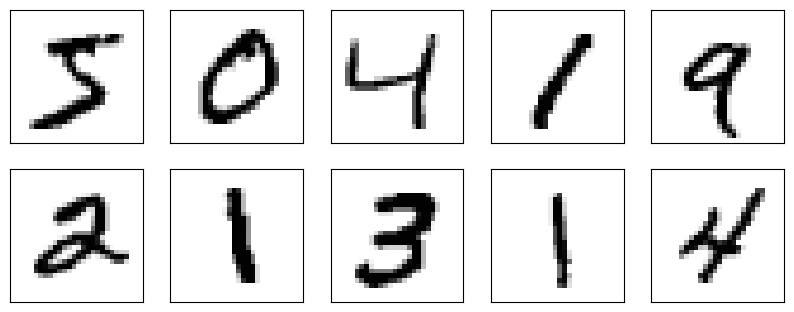

In [108]:
# plot the first 10 datapoints

plt.figure(figsize=(10,10))

# create the grid of 10 images

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i,:,:],cmap=plt.cm.binary)

In [109]:
# data type of the input

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [110]:
# normalize the pixel value

X_train = X_train/255.0
X_test = X_test/255.0

In [111]:
X_train.shape

(60000, 28, 28)

In [112]:
# add chanel information in the data

X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

In [113]:
X_train.ndim , X_test.ndim

(4, 4)

## Model

In [114]:
# define the model

model = Sequential()

In [115]:
# add convolutional layer to the model

# Input layer
model.add(Input(shape=(img_rows,img_cols,1)))

# conv layer
model.add(Conv2D(16,kernel_size=(3,3),padding="valid",activation='relu'))

# max poll 2D
model.add(MaxPool2D(pool_size=(2,2)))

In [116]:
# flatten the output

model.add(Flatten())

# fc layers 
# hidden layers
model.add(Dense(units=32,activation='relu'))

# dropout layers 
model.add(Dropout(rate=0.4))

# output layers
model.add(Dense(units=num_classes,activation='softmax'))

In [117]:
# model summary

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,050 (340.04 KB)

 Trainable params: 87,050 (340.04 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# compile the model 

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [119]:
# fit the model on training data

model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8416 - loss: 0.4975 - val_accuracy: 0.9684 - val_loss: 0.1118
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9224 - loss: 0.2475 - val_accuracy: 0.9759 - val_loss: 0.0808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9370 - loss: 0.1996 - val_accuracy: 0.9769 - val_loss: 0.0689
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9428 - loss: 0.1781 - val_accuracy: 0.9774 - val_loss: 0.0715
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9469 - loss: 0.1647 - val_accuracy: 0.9819 - val_loss: 0.0582
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9509 - loss: 0.1532 - val_accuracy: 0.9829 - val_loss: 0.0553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9524 - loss: 0.1455 - val_accuracy: 0.9827 - val_loss: 0.0571
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9541 - loss: 0.1346 - 

In [120]:
# evaluate the model in test data

model.evaluate(X_test,y_test,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0574


{'accuracy': 0.9832000136375427, 'loss': 0.05735345557332039}

## SHAP

In [121]:
import shap

In [122]:
# create the background data with 200 samples

background = X_train[(np.random.choice(X_train.shape[0],200,replace=False))]

background.shape

(200, 28, 28, 1)

In [123]:
# explainer

explainer = shap.DeepExplainer(model=model,data=background)

e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_27
Received: inputs=['Tensor(shape=(200, 28, 28, 1))']
  warnings.warn(msg)


In [124]:
# calculate the shap values

test_data = X_test[0:5]

test_data.shape

(5, 28, 28, 1)

In [125]:
shap_values = explainer(test_data)

e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_27
Received: inputs=['Tensor(shape=(400, 28, 28, 1))']
  warnings.warn(msg)
e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_27
Received: inputs=['Tensor(shape=(5, 28, 28, 1))']
  warnings.warn(msg)


In [126]:
shap_values.values.shape

(5, 28, 28, 1, 10)

In [127]:
shap_values.values[:,:,:,:,0].shape

(5, 28, 28, 1)

In [128]:
shap_values.values[:,:,:,:,2].shape

(5, 28, 28, 1)

In [129]:
# shap value list

shap_values_list = []

for i in range(10):
    shap_values_list.append(shap_values.values[:,:,:,:,i])


In [130]:
len(shap_values_list)

10

In [131]:
shap_values_list[0].shape

(5, 28, 28, 1)

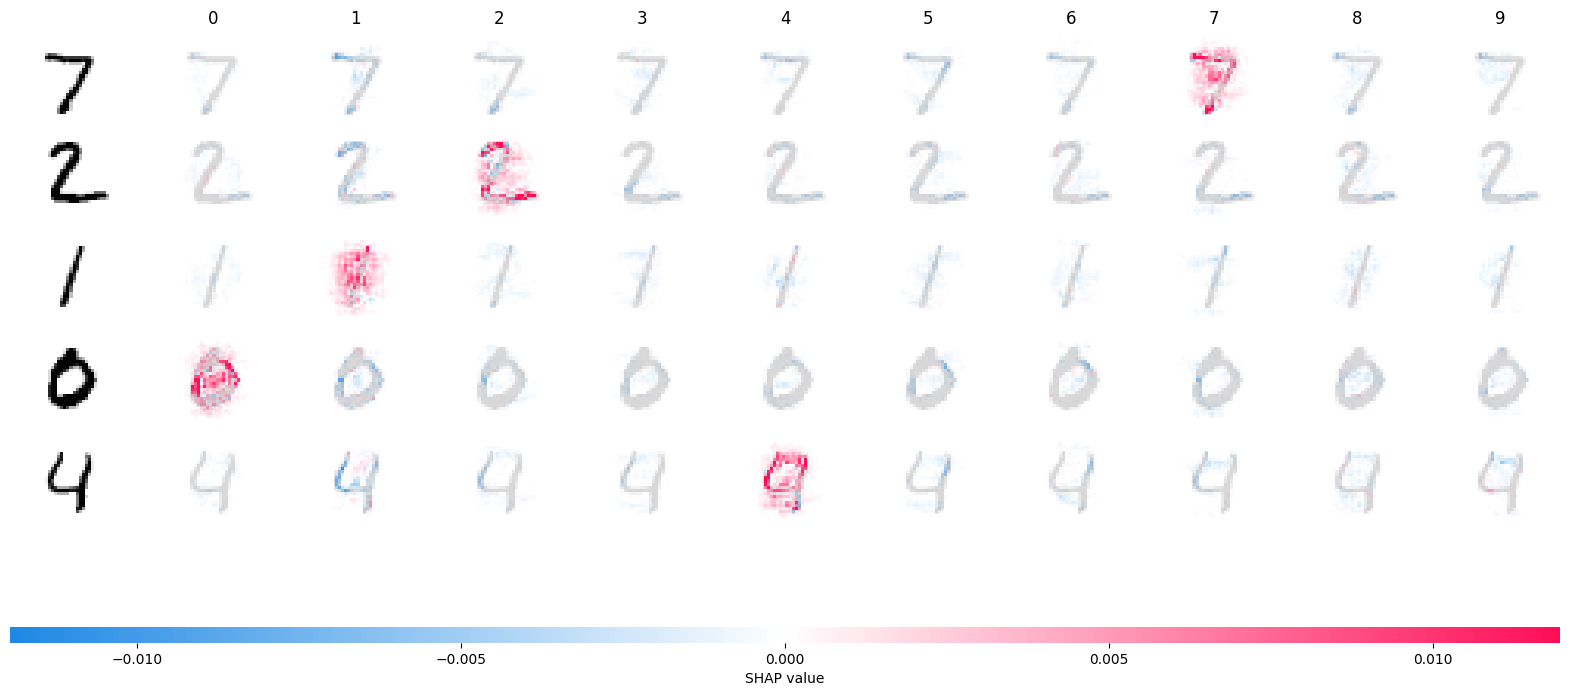

In [132]:
# plat the image plot

shap.plots.image(shap_values_list,-test_data,labels=list(range(10)))